In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from src.addons.images.mark import random_mark

---

In [3]:
marks = random_mark(batch_size=2, shape=8)

2023-12-24 01:00:54.356121: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-24 01:00:54.356142: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-24 01:00:54.356147: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-24 01:00:54.356176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-24 01:00:54.356189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-12-24 01:00:54.361476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


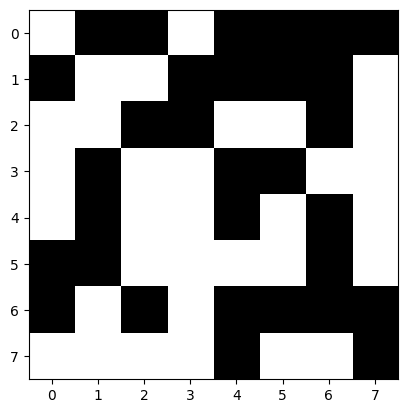

In [4]:
plt.imshow(marks[0], cmap="gray")

In [5]:
def arnold_cat_map(image, iterations=2):
    height, width = tf.shape(image)[0], tf.shape(image)[1]

    for _ in range(iterations):
        x, y = tf.meshgrid(tf.range(width), tf.range(height))
        new_x = tf.math.floormod(2 * x + y, width)
        new_y = tf.math.floormod(x + y, height)
        indices = tf.transpose(tf.stack([new_y, new_x], axis=0))
        image = tf.gather_nd(image, indices)

    return image

def vec_arnold_cat_map(images, iterations):
    return tf.vectorized_map(arnold_cat_map, images)

In [6]:
def inverse_arnold_cat_map(image, iterations=2):
    height, width = tf.shape(image)[0], tf.shape(image)[1]

    for _ in range(iterations):
        x, y = tf.meshgrid(tf.range(width), tf.range(height))
        new_x = tf.math.floormod(-2 * x + y, width)
        new_y = tf.math.floormod(x - y, height)
        indices = tf.transpose(tf.stack([new_y, new_x], axis=0))
        image = tf.gather_nd(image, indices)

    return image

def vec_inverse_arnold_cat_map(images, iterations):
    return tf.vectorized_map(inverse_arnold_cat_map, images)

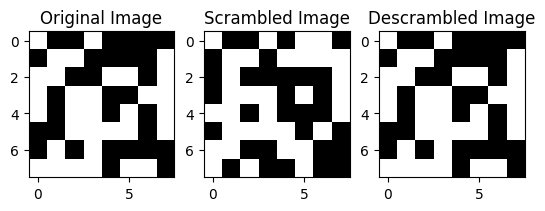

In [7]:
scrambled_image = arnold_cat_map(marks[0], iterations=10)
descrambled_image = inverse_arnold_cat_map(scrambled_image, iterations=10)

plt.subplot(1, 3, 1)
plt.imshow(marks[0], cmap="gray")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(scrambled_image, cmap="gray")
plt.title('Scrambled Image')

plt.subplot(1, 3, 3)
plt.imshow(descrambled_image, cmap="gray")
plt.title('Descrambled Image')

plt.show()

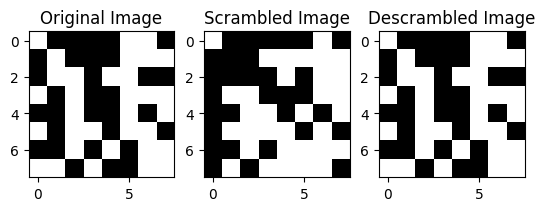

In [8]:
scrambled_image = vec_arnold_cat_map(marks, iterations=10)
descrambled_image = vec_inverse_arnold_cat_map(scrambled_image, iterations=10)

plt.subplot(1, 3, 1)
plt.imshow(marks[1], cmap="gray")
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(scrambled_image[1], cmap="gray")
plt.title('Scrambled Image')

plt.subplot(1, 3, 3)
plt.imshow(descrambled_image[1], cmap="gray")
plt.title('Descrambled Image')

plt.show()